# Experiment 2

## Problem Statement:
To build an ANN Model to convert temperature in degree Celsius to Fahrenheit.

## GitHub & Google Collab Links:

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%202/Experiment%202.ipynb

Google Collab Link: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%202/Experiment%202.ipynb)


## Installing Dependencies:

! pip install tensorflow numpy matplotlib scikit-learn pandas seaborn 

## Code

In [1]:
# importing required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
dataset = pd.read_csv('celcius_to_fahrenheit_dataset.csv')

# printing the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())

# printing the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(dataset.tail())


First 5 rows of the dataset:
   Celsius  Fahrenheit
0      -67       -88.6
1       40       104.0
2      -97      -142.6
3       57       134.6
4      -50       -58.0

Last 5 rows of the dataset:
     Celsius  Fahrenheit
995      -80      -112.0
996       50       122.0
997       18        64.4
998       47       116.6
999      -67       -88.6


In [3]:
# describing the dataset
print("\nDescription of the dataset:")
print(dataset.describe())

# checking information about the dataset
print("\nInformation about the dataset:")
print(dataset.info())


Description of the dataset:
           Celsius   Fahrenheit
count  1000.000000  1000.000000
mean     -0.029000    31.947800
std      57.334173   103.201511
min    -100.000000  -148.000000
25%     -50.000000   -58.000000
50%      -2.000000    28.400000
75%      50.000000   122.000000
max     100.000000   212.000000

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None


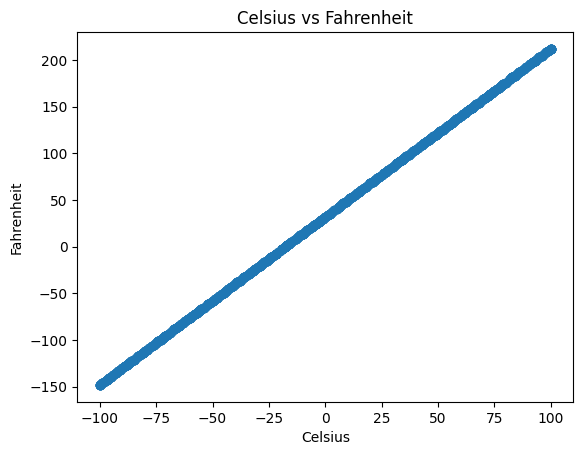

In [4]:
# plotting scatter plot between Celsius and Fahrenheit
plt.scatter(dataset['Celsius'], dataset['Fahrenheit'])
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

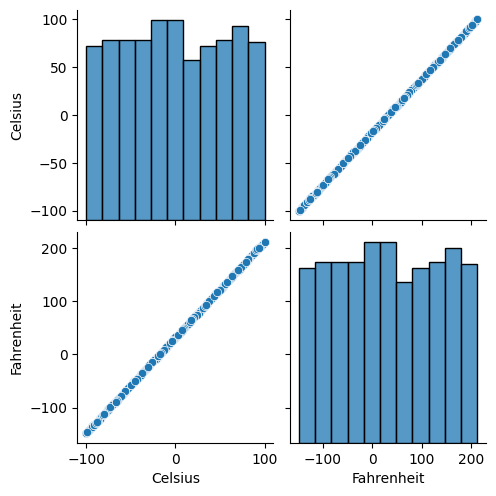

In [5]:
# plotting the pair plot of the dataset
sns.pairplot(dataset)
plt.show()
    

In [6]:
# creating training and testing dataset
X_train = dataset['Celsius']
y_train = dataset['Fahrenheit']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1000,)
Shape of y_train: (1000,)


In [7]:
# training the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

c:\Users\mainp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compiling the model with a correct learning rate format
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.0),  # Use a float for learning rate
              loss='mean_squared_error')

# Training the model
epochs_hist = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 184185392.0000 - val_loss: 19116780.0000
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8236354.5000 - val_loss: 225760.6562
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179850.9219 - val_loss: 13941.5430
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12388.3965 - val_loss: 1299.8925
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1352.4651 - val_loss: 669.6835
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 537.3693 - val_loss: 290.2394
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242.8764 - val_loss: 124.3791
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.0022 - val_loss: 47.9577
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.3891 - val_loss: 16.8620
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1718 - val_loss: 5.3163
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1010 - val_loss: 1.5207
Epoch 12/30
2

Loss of the model: 1.499840363017313e-09
Validation Loss of the model: 1.4503127587772724e-09


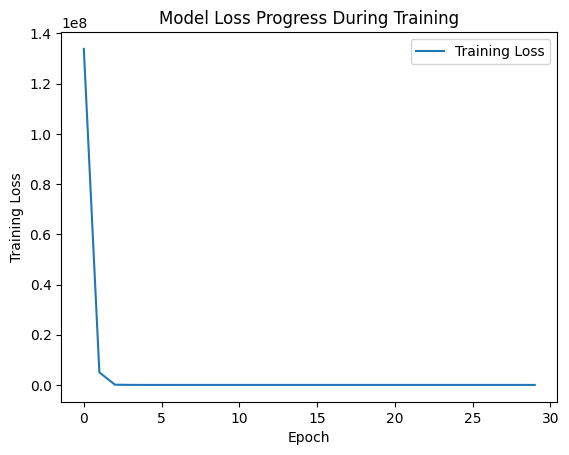

In [11]:
# evaluating the model
print("Loss of the model:", epochs_hist.history['loss'][-1])
print("Validation Loss of the model:", epochs_hist.history['val_loss'][-1])

# plotting the loss
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

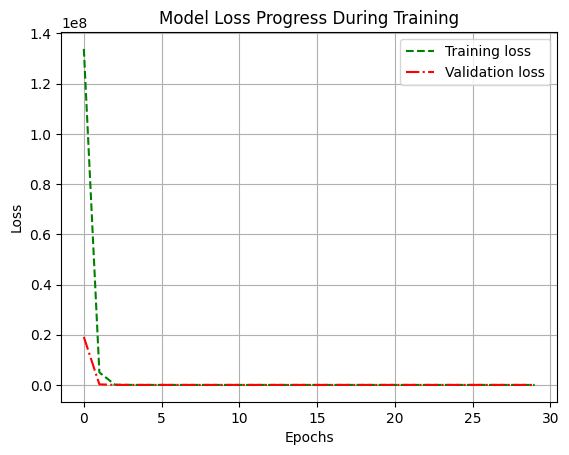

In [12]:
# plotting the loss and validation loss together
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss', linestyle='--')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss', linestyle='-.')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# model weights
print("Model Weights:", model.get_weights())


Model Weights: [array([[ 0.25968587,  0.22125825,  0.28224224, -0.17559958,  0.23964815,
        -0.22765678,  0.21759656,  0.35055447,  0.14478815, -0.26485002,
         0.19265151, -0.13548216, -0.2397434 , -0.19253737,  0.16309   ,
         0.30045104, -0.20057109,  0.20200449,  0.31095803,  0.13719064,
         0.22023755,  0.23763582, -0.23571041,  0.21217768, -0.19351862,
         0.17558281, -0.22309747,  0.16892143, -0.34211284,  0.06600088,
         0.316667  , -0.17547919]], dtype=float32), array([-2.8962476 ,  1.1375874 ,  1.0828029 , -4.1755123 , -3.1734562 ,
        0.40072462,  1.2057605 , -0.25412676,  5.3564715 ,  3.0925992 ,
        3.9584725 , -1.82679   , -0.6908085 , -3.962711  ,  5.1209865 ,
       -3.2419553 , -0.99446344,  2.322351  , -0.59030426,  5.5396786 ,
       -1.2115853 ,  0.74181646, -1.8299431 ,  4.683813  ,  2.735801  ,
        5.0844874 , -0.9813589 ,  5.412247  ,  0.56680304, -2.441406  ,
       -0.47981733, -4.6937227 ], dtype=float32), array([[-1.7

In [15]:

# Making predictions
# Convert to a numpy array and keep it as a batch of one element
Celsius_value = np.array([100])
Fahrenheit_value = model.predict(Celsius_value)
print("Fahrenheit value for Celsius value 100:", Fahrenheit_value[0])

# Calculating with formula
Fahrenheit_value_formula = 9/5 * Celsius_value[0] + 32
print("Fahrenheit value for Celsius value 100 using formula:",
      Fahrenheit_value_formula)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Fahrenheit value for Celsius value 100: [212.00005]
Fahrenheit value for Celsius value 100 using formula: 212.0


In [16]:
# saving the model
model.save('celcius_to_fahrenheit_model.h5')